<h1>Acquiring an image</h1>
<em>WARNING: It is not recommended to start doing any tests on a real microscope until the script is debugged. 
    For the first steps with scripting it is strongly recommended to work with SEM demo software!! </em>

1. Use the same as in the previous lesson <a href="1-loadinglibs.ipynb">Loading libraries</a>:

In [1]:
#importing the system libraries
import os, sys
#adding the SharkSEM folder to the python search path
shark_dir = os.path.abspath("./SharkSEM")
sys.path.append(shark_dir)

#importing the library of SEM control functions
from sem import Sem

#creating a new instance of the Sem classs
mySEM = Sem()

#define the IP address of the SEM PC
sem_ip="localhost"
#sem_ip = input("Enter the IP address of the SEM: ")

#connecting to the microscope via SharkSEM protocol
res = mySEM.Connect(sem_ip, 8300)
#handling the output
if res < 0:
    raise Error("Unable to connect SEM/FIB at %s:8300"%(sem_ip))
else:
    print("SEM connected at %s:8300!"%(sem_ip))


SEM connected at localhost:8300!


If connected we can start with calling the SharkSEM functions

In [2]:
mySEM.HVBeamOn()


det.0.name=SE
det.0.detector=0
det.1.name=BSE
det.1.detector=1
det.2.name=InBeam SE
det.2.detector=3
det.3.name=TE Bright
det.3.detector=5
det.4.name=TE Dark
det.4.detector=6

gain/black:  [41.6, 53.5]


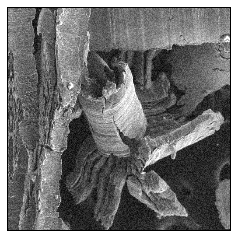

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, clear_output, Image


# let us take a look at the detector configuration
print(mySEM.DtEnumDetectors())
    
# set the Probe Current - this is equivalent to BI in SEM Generation 3
mySEM.SetPCIndex(10)

# important: stop the scanning before we start scanning or before automatic procedures,
# even before we configure the detectors
mySEM.ScStopScan()

# select detector and enable channel
mySEM.DtSelect(0, 0)
mySEM.DtEnable(0, 1, 8)

# now tell the engine to wait for scanning inactivity and auto procedure finish,
# see the docs for details
mySEM.SetWaitFlags(0x09)

# adjust brigtness and contrast, read back the result
#mySEM.DtAutoSignal(0)
print('gain/black: ', mySEM.DtGetGainBlack(0))

# start single frame acquisition at speed 3
mySEM.ScSetSpeed(3)
mySEM.ScScanXY(0, 512, 512, 0, 0, 511, 511, 1)

# fetch the image (blocking operation), string is returned
img_str = mySEM.FetchImage(0, 512 * 512)

# we must stop the scanning even after single scan
mySEM.ScStopScan()

# import the image string as a Numpy Array
img = np.fromstring(img_str, dtype="uint8").reshape(512,512)
fig, ax = plt.subplots()
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xticklabels((0,512))
x=ax.imshow(img,cmap="gray")

